In [67]:
%matplotlib inline
%load_ext autoreload

%autoreload 2

import pandas as pd
import numpy as np
import pyDOE

from pandas_helper import *


from generate_doe import generate_doe, correlation_matrix

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
def cartesian(df1, df2):
    rows = itertools.product(df1.iterrows(), df2.iterrows())

    df = pd.DataFrame(left.append(right) for (_, left), (_, right) in rows)
    return df.reset_index(drop=True)

# number of simulations we can afford

In [93]:
n_sample=100

# weighted case

In [70]:
## dimensions we want to cover

In [71]:
doe_params_simple  = pd.read_excel("doe_parameters_combined.xlsx", sheet_name="simple_dimensions")
doe_params_simple

,demand,OPEC
0,low_1.5,opec_full
1,med_2,opec_contrained
2,high_3,NaN


In [72]:
doe_params_coump  = pd.read_excel("doe_parameters_combined.xlsx", sheet_name="coumpounded_dimensions")
doe_params_coump.columns.name = "dim"
doe_params_coump.index.name = "case"
doe_params_coump

dim,fiscal_pressure,fiscal_regime
case,,
0,fiscal_low,fi_A
1,fiscal_high,fi_B
2,NaN,fi_C


In [73]:
country_gp = pd.read_excel("doe_parameters_combined.xlsx", sheet_name="country_group").set_index("country").squeeze()
country_gp.index.name = "country"
country_gp


country
Brazil       1
Colombia     2
Venezuela    3
trinindad    4
uruguay      4
Name: group, dtype: int64

# simple DOE using one dimension per variable

In [74]:
coumpounded_dims =broadcast_simple(doe_params_coump.stack(), country_gp.index).unstack().unstack()

doe_params = merge_column_index(coumpounded_dims)
doe_params

,demand,OPEC,fiscal_pressure_Brazil,fiscal_pressure_Colombia,fiscal_pressure_Venezuela,fiscal_pressure_trinindad,fiscal_pressure_uruguay,fiscal_regime_Brazil,fiscal_regime_Colombia,fiscal_regime_Venezuela,fiscal_regime_trinindad,fiscal_regime_uruguay
0,low_1.5,opec_full,fiscal_low,fiscal_low,fiscal_low,fiscal_low,fiscal_low,fi_A,fi_A,fi_A,fi_A,fi_A
1,med_2,opec_contrained,fiscal_high,fiscal_high,fiscal_high,fiscal_high,fiscal_high,fi_B,fi_B,fi_B,fi_B,fi_B
2,high_3,NaN,NaN,NaN,NaN,NaN,NaN,fi_C,fi_C,fi_C,fi_C,fi_C


In [94]:
df, norm_doe = generate_doe(n_sample,doe_params, verbose=True)

ndim=12
new candidate solution found with max,abs corrcoef = 0.8923050132557868
correlation                              demand      OPEC  fiscal_pressure_Brazil  \
demand                     1.000000 -0.071568                0.017681   
OPEC                      -0.071568  1.000000                0.054054   
fiscal_pressure_Brazil     0.017681  0.054054                1.000000   
fiscal_pressure_Colombia  -0.177409 -0.122513               -0.230850   
fiscal_pressure_Venezuela -0.065290  0.061329                0.069630   
fiscal_pressure_trinindad -0.073371  0.068325                0.055959   
fiscal_pressure_uruguay    0.185366  0.007674               -0.207093   
fiscal_regime_Brazil      -0.029779 -0.033725               -0.118603   
fiscal_regime_Colombia    -0.022660  0.031413                0.147947   
fiscal_regime_Venezuela   -0.038434  0.093946                0.341172   
fiscal_regime_trinindad    0.070676 -0.080805                0.004851   
fiscal_regime_uruguay     -0.048

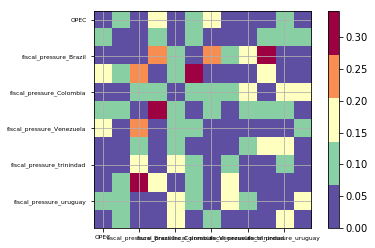

In [95]:
correlation_matrix(norm_doe)

In [97]:
norm_doe

,demand,OPEC,fiscal_pressure_Brazil,fiscal_pressure_Colombia,fiscal_pressure_Venezuela,fiscal_pressure_trinindad,fiscal_pressure_uruguay,fiscal_regime_Brazil,fiscal_regime_Colombia,fiscal_regime_Venezuela,fiscal_regime_trinindad,fiscal_regime_uruguay
0,0.102675,0.416765,0.362021,0.338950,0.886040,0.247499,0.194355,0.696123,0.042157,0.915738,0.531102,0.137994
1,0.827487,0.611505,0.121865,0.135361,0.968031,0.072377,0.634200,0.867665,0.166896,0.120843,0.822726,0.614050
2,0.592441,0.922061,0.068010,0.944662,0.106819,0.784086,0.873157,0.136159,0.457006,0.021211,0.911809,0.375113
3,0.445543,0.596282,0.168855,0.873011,0.489047,0.777180,0.679670,0.100415,0.054789,0.388701,0.632562,0.687419
4,0.722103,0.075268,0.027520,0.769045,0.210268,0.168935,0.538831,0.220086,0.988786,0.162407,0.426344,0.628670
5,0.144981,0.442039,0.102222,0.850441,0.778456,0.884280,0.421316,0.374074,0.577037,0.102122,0.522778,0.535149
6,0.056759,0.291083,0.271953,0.491410,0.155169,0.496701,0.657522,0.351903,0.559583,0.352271,0.890964,0.732105
7,0.553875,0.816848,0.351094,0.458143,0.131895,0.293203,0.766780,0.249869,0.277337,0.255777,0.963153,0.482650
8,0.603752,0.750508,0.936629,0.937990,0.473788,0.578184,0.472369,0.949127,0.718063,0.900064,0.946599,0.417384
9,0.376377,0.508037,0.742242,0.830163,0.169123,0.979043,0.153708,0.983597,0.202071,0.951989,0.901394,0.779225


In [96]:
norm_doe.corr()


,demand,OPEC,fiscal_pressure_Brazil,fiscal_pressure_Colombia,fiscal_pressure_Venezuela,fiscal_pressure_trinindad,fiscal_pressure_uruguay,fiscal_regime_Brazil,fiscal_regime_Colombia,fiscal_regime_Venezuela,fiscal_regime_trinindad,fiscal_regime_uruguay
demand,1.000000,-0.071568,0.017681,-0.177409,-0.065290,-0.073371,0.185366,-0.029779,-0.022660,-0.038434,0.070676,-0.048157
OPEC,-0.071568,1.000000,0.054054,-0.122513,0.061329,0.068325,0.007674,-0.033725,0.031413,0.093946,-0.080805,0.074722
fiscal_pressure_Brazil,0.017681,0.054054,1.000000,-0.230850,0.069630,0.055959,-0.207093,-0.118603,0.147947,0.341172,0.004851,0.028992
fiscal_pressure_Colombia,-0.177409,-0.122513,-0.230850,1.000000,0.113817,0.308963,0.007794,0.006346,-0.060247,-0.158879,0.041290,-0.029092
fiscal_pressure_Venezuela,-0.065290,0.061329,0.069630,0.113817,1.000000,0.081265,-0.114827,-0.080635,0.148816,-0.025053,-0.144086,0.197204
fiscal_pressure_trinindad,-0.073371,0.068325,0.055959,0.308963,0.081265,1.000000,0.104194,0.005297,-0.105268,-0.100004,0.086750,0.047785
fiscal_pressure_uruguay,0.185366,0.007674,-0.207093,0.007794,-0.114827,0.104194,1.000000,-0.029264,0.020734,-0.055672,0.015153,0.099793
fiscal_regime_Brazil,-0.029779,-0.033725,-0.118603,0.006346,-0.080635,0.005297,-0.029264,1.000000,0.090186,0.154369,-0.145683,0.054363
fiscal_regime_Colombia,-0.022660,0.031413,0.147947,-0.060247,0.148816,-0.105268,0.020734,0.090186,1.000000,0.019956,-0.107028,0.058959
fiscal_regime_Venezuela,-0.038434,0.093946,0.341172,-0.158879,-0.025053,-0.100004,-0.055672,0.154369,0.019956,1.000000,0.033248,-0.059061


In [ ]:
df.to_csv("simple_doe.csv")
df

In [22]:
df.describe()

,demand,OPEC,fiscal_pressure_Brazil,fiscal_pressure_Colombia,fiscal_pressure_Venezuela,fiscal_pressure_trinindad,fiscal_pressure_uruguay,fiscal_regime_Brazil,fiscal_regime_Colombia,fiscal_regime_Venezuela,fiscal_regime_trinindad,fiscal_regime_uruguay
count,100,100,100,100,100,100,100,100,100,100,100,100
unique,3,2,2,2,2,2,2,3,3,3,3,3
top,med_2,opec_contrained,fiscal_high,fiscal_high,fiscal_high,fiscal_high,fiscal_high,fi_B,fi_C,fi_C,fi_B,fi_B
freq,34,50,50,50,50,50,50,34,34,34,34,34


In [24]:
df.apply(pd.value_counts).sum(axis=1).sort_values()

high_3              33.0
low_1.5             33.0
med_2               34.0
opec_contrained     50.0
opec_full           50.0
fi_A               166.0
fi_B               167.0
fi_C               167.0
fiscal_high        250.0
fiscal_low         250.0
dtype: float64

In [25]:
df.T.corr()

""


#  DOE grouping some variables in comon dimenion